Social Network Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
import math

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

The dataset contains the details of users in a social networking site to find whether a user buys a product by clicking the ad on the site based on their salary, age, and gender.

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print("length:",len(dataset))
print(dataset.head())

length: 400
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
print('Rows     :',dataset.shape[0])
print('Columns  :',dataset.shape[1])
print('\nFeatures :\n     :',dataset.columns.tolist())
print('\nMissing values    :',dataset.isnull().values.sum())
print('\nUnique values :  \n',dataset.nunique())

Rows     : 400
Columns  : 5

Features :
     : ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

Missing values    : 0

Unique values :  
 User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


Salary distribution

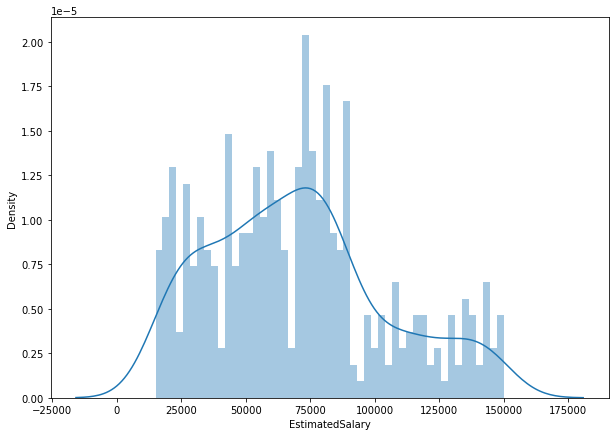

In [5]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.distplot(dataset['EstimatedSalary'],kde=True,bins=50);

In [6]:
X = dataset.iloc[:, [1, 2, 3]].values #pandas, all rows, 1,2,3 columns 
y = dataset.iloc[:, -1].values # just want the answer in last colm

Since our dataset containing character variables we have to encode it using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
#Gender chnaged to 1 0

In [8]:
print(X)

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


Split the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,test_size=0.2)

Feature Scalling 

In [10]:
from sklearn.preprocessing import StandardScaler

scalar_X = StandardScaler() #to the training and test set of independent variables for reducing the size to smaller values
X_train = scalar_X.fit_transform(X_train)
X_test = scalar_X.transform(X_test)

Define the Model - in K-NN

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

We are using 3 parameters in the model creation. if n_neighbors is setting as 5, which means 5 neighborhood points are required for classifying a given point. The distance metric we can use Minkowski or euclidean.

As per the equation, we have to select the p-value also.
p = 1 , Manhattan Distance
p = 2 , Euclidean Distance
p = infinity , Cheybchev Distance
In our problem, we are choosing the p as 2 (also qw can choose the metric as “euclidean”)
Our Model is created, now we have to predict the output for the test set

Fit the Model

In [12]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Predict the test results

In [13]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

Evaluate the Model

In [14]:
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[55  3]
 [ 1 21]]


In [15]:
#55 and 21 are correct 
#3 and 1 are wrong

In [16]:
print(f1_score(y_test, y_pred))

0.9130434782608695


In [17]:
print(accuracy_score(y_test, y_pred)) #How many right out of wrong 

0.95


Conclusion:
1. KNN algorithm is used for classification.Here we have predicted purchase decision using KNN Algorithm.

2. In case of KNN algorithm the critical factor is to find out the optimum value of K.The optimum value of K results in better model performance.

3. We found out that K=5 is the optimum vale of K for this dataset.By using k=5 the accuracy of our model has increased from 91% to 95%.